# Python для визуализации данных

Татьяна Рогович, НИУ ВШЭ


In [2]:
# наша основная библиотека для визуализаций
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline  

# Графики для категориальных переменных: столбчатые диаграммы, совмещенные столбчатые диаграммы, график рассеяния для категориальных переменных

Тут будем работать по мотивам вот этого блокнота.

https://nbviewer.jupyter.org/github/yaph/ipython-notebooks/blob/master/movie-body-counts.ipynb

Бдуем работать с датасетом, который подсчитывает количество смертей в фильмах (меотодологию сбора данных можно посмотреть по ссылке выше). Несколько графиков мы рассмотрим на занятии, остальные можно изучить самостоятельно.

Очень часто для того, чтобы получить тот график, который хотим - нужно сделать правильную группировку. С этим тоже тут поработаем.


In [3]:
movies = pd.read_csv('filmdeathcounts.csv')
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


Для начала нам нужно решить две проблемы - в колонках Genre и Director может быть несколько значений. Давайте подумаем, как их извлечь.
Также создадим две новые переменные - FilmCount c единицами во сех колонках (понадобится потом для графиков) и Body_Count_Min (количество смертей в минуту экранного времени).


In [4]:
movies['Film_Count'] = 1
movies['Body_Count_Min'] = movies['Body_Count'] / movies['Length_Minutes'].astype(float)
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3,1,0.059829
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6,1,0.469027
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0,1,2.120000
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6,1,0.592920
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,1,5.128205


In [5]:
# мы будем работать с итератором iterrows, посмотрим, что он возвращает
for i in movies.iterrows():
    print(i)
    print('____________________')
    print(i[0])
    print('____________________')
    print(i[1])
    print('____________________')

    break

(0, Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                        0.059829
Name: 0, dtype: object)
____________________
0
____________________
Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                     

In [6]:
'Biography|Comedy|Drama|Music'.split('|')

['Biography', 'Comedy', 'Drama', 'Music']

Теперь давайте попробуем реализовать нашу идею на одном примере.

In [7]:
di = {}
idx = 0
col = 'Genre'
sep='|'

for i in movies.iterrows(): # проходимся по наблюдениям
    d = i[1] # достаем первый объект, в котором хранятся все переменные, кроме индекса 
    print(d)
    print('_____')
    names = d[col].split(sep) # разбиваем колонку жанр по разделителю
    print(names)
    print('_____')
    for name in names:
        c = d.copy() # работаем с копией нашего фильма, чтобы не перезаписать его
        print(c)
        print('_____')
        c[col] = name # меняем в копии значение в колонке Genre
        print(c)
        print('_____')
        di[idx] = c # кладем нашу новую колонку в словарь под текущим индексом
        idx += 1 # обновляем индекс
        print(di)
        print('_____')
        
    break

Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                        0.059829
Name: 0, dtype: object
_____
['Biography', 'Comedy', 'Drama', 'Music']
_____
Film                      24 Hour Party People
Year                                      2002
Body_Count                                   7
MPAA_Rating                                  R
Genre             Biography|Comedy|Drama|Music
Director                  Michael Winterbottom
Length_Minutes                             117
IMDB_Rating                                7.3
Film_Count                                   1
Body_Count_Min                

In [8]:
pd.DataFrame(di) # как будет выглядеть наш новый датафрейм

,0,1,2,3
Film,24 Hour Party People,24 Hour Party People,24 Hour Party People,24 Hour Party People
Year,2002,2002,2002,2002
Body_Count,7,7,7,7
MPAA_Rating,R,R,R,R
Genre,Biography,Comedy,Drama,Music
Director,Michael Winterbottom,Michael Winterbottom,Michael Winterbottom,Michael Winterbottom
Length_Minutes,117,117,117,117
IMDB_Rating,7.3,7.3,7.3,7.3
Film_Count,1,1,1,1
Body_Count_Min,0.059829,0.059829,0.059829,0.059829


In [9]:
pd.DataFrame(di).transpose() # транспонируем. Отлично, то, что нужно!

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
1,24 Hour Party People,2002,7,R,Comedy,Michael Winterbottom,117,7.3,1,0.059829
2,24 Hour Party People,2002,7,R,Drama,Michael Winterbottom,117,7.3,1,0.059829
3,24 Hour Party People,2002,7,R,Music,Michael Winterbottom,117,7.3,1,0.059829


Теперь соберем все в функцию. Помним, что будем ее применять к двум колонкам по очереди (режиссер и жанр).

In [10]:
def expand_col(df_src, col, sep='|'):
    di = {}
    idx = 0
    for i in df_src.iterrows():
        d = i[1]
        names = d[col].split(sep)
        for name in names:
            # operate on a copy to not overwrite previous director names
            c = d.copy()
            c[col] = name
            di[idx] = c
            idx += 1

    df_new = pd.DataFrame(di).transpose()
    
    return df_new

In [11]:
movies.shape

(545, 10)

In [12]:
df_dir = expand_col(movies, 'Director') # примениям к режиссерам
df_dir.shape

(570, 10)

In [13]:
df_genre = expand_col(df_dir, 'Genre') # а теперь уже датафрейм с обработанными режиссерами, обрабатываем на жанры
df_genre.shape

(1759, 10)

In [14]:
df_genre.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
1,24 Hour Party People,2002,7,R,Comedy,Michael Winterbottom,117,7.3,1,0.059829
2,24 Hour Party People,2002,7,R,Drama,Michael Winterbottom,117,7.3,1,0.059829
3,24 Hour Party People,2002,7,R,Music,Michael Winterbottom,117,7.3,1,0.059829
4,28 Days Later,2002,53,R,Horror,Danny Boyle,113,7.6,1,0.469027


In [15]:
# проверим, есть ли дубликаты
df_genre.drop_duplicates().shape

(1751, 10)

In [16]:
# сохраним результат в переменную movies
movies = df_genre.drop_duplicates()
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
1,24 Hour Party People,2002,7,R,Comedy,Michael Winterbottom,117,7.3,1,0.059829
2,24 Hour Party People,2002,7,R,Drama,Michael Winterbottom,117,7.3,1,0.059829
3,24 Hour Party People,2002,7,R,Music,Michael Winterbottom,117,7.3,1,0.059829
4,28 Days Later,2002,53,R,Horror,Danny Boyle,113,7.6,1,0.469027


In [17]:
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
1,24 Hour Party People,2002,7,R,Comedy,Michael Winterbottom,117,7.3,1,0.059829
2,24 Hour Party People,2002,7,R,Drama,Michael Winterbottom,117,7.3,1,0.059829
3,24 Hour Party People,2002,7,R,Music,Michael Winterbottom,117,7.3,1,0.059829
4,28 Days Later,2002,53,R,Horror,Danny Boyle,113,7.6,1,0.469027


Наши переменные после обработки функцией распознаются как текстовые. Давайте это исправим.

In [18]:
for col in ['Body_Count', 'Length_Minutes', 'Film_Count', 'Body_Count_Min']:
    movies[col] = movies[col].astype(float)

C:\Users\mbbur\AppData\Local\Temp\ipykernel_19620\2320771320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[col] = movies[col].astype(float)
C:\Users\mbbur\AppData\Local\Temp\ipykernel_19620\2320771320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[col] = movies[col].astype(float)
C:\Users\mbbur\AppData\Local\Temp\ipykernel_19620\2320771320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [19]:
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7.0,R,Biography,Michael Winterbottom,117.0,7.3,1.0,0.059829
1,24 Hour Party People,2002,7.0,R,Comedy,Michael Winterbottom,117.0,7.3,1.0,0.059829
2,24 Hour Party People,2002,7.0,R,Drama,Michael Winterbottom,117.0,7.3,1.0,0.059829
3,24 Hour Party People,2002,7.0,R,Music,Michael Winterbottom,117.0,7.3,1.0,0.059829
4,28 Days Later,2002,53.0,R,Horror,Danny Boyle,113.0,7.6,1.0,0.469027


Обратите внимание, что мы работаем с таким датасетом, где один и тот же фильм может встречаться несколько раз (это связано с тем, что он может относиться к нескольким жанрам или имеет несколько режиссеров - эта информация добавляет дополнительные ряды). Поэтому при некоторых агрегациях будем выкидывать дубликаты из колонки Film, чтобы не было задвоения.

In [20]:
movies.shape # размер оригинального датафрейма

(1751, 10)

In [21]:
movies.drop_duplicates('Film').shape # размер датафрейма для уникальных фильмов

(537, 10)

In [22]:
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7.0,R,Biography,Michael Winterbottom,117.0,7.3,1.0,0.059829
1,24 Hour Party People,2002,7.0,R,Comedy,Michael Winterbottom,117.0,7.3,1.0,0.059829
2,24 Hour Party People,2002,7.0,R,Drama,Michael Winterbottom,117.0,7.3,1.0,0.059829
3,24 Hour Party People,2002,7.0,R,Music,Michael Winterbottom,117.0,7.3,1.0,0.059829
4,28 Days Later,2002,53.0,R,Horror,Danny Boyle,113.0,7.6,1.0,0.469027


Давайте сгруппируем фильмы по году и суммируем значения для того, чтобы построить столбчатый график.

## Агрегация по годам. Столбчатый график

Давайте построим два столбчатых графика, которые показывают количество фильмов за каждый год и общее количество смертей на экране.

In [23]:
movies_year = movies.drop_duplicates('Film').groupby('Year').sum()

In [24]:
movies_year.tail()

,Film,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Year,,,,,,,,,
2007,28 Weeks Later30 Days of Night3003:10 To YumaA...,4095.0,RRRRRRRRRPG-13PG-13RRPG-13PGPG-13UnratedUnrate...,HorrorHorrorActionAdventureActionBiographyBiog...,Juan Carlos FresnadilloDavid SladeZack SnyderJ...,5475.0,327.8,48.0,35.992220
2008,AppaloosaBangkok DangerousCloverfieldDoomsdayF...,1785.0,RRPG-13RPG-13RPG-13PG-13PG-13PG-13RRRRRRRRPG-1...,CrimeActionActionActionAdventureComedyActionAc...,Ed HarrisOxide Pang ChunMatt ReevesNeil Marsha...,2850.0,170.9,26.0,16.522174
2009,Black DynamiteDistrict 9Friday the 13thInglour...,605.0,RRRRRRPG-13RRRR,ActionActionHorrorAdventureHorrorActionActionA...,Scott SandersNeill BlomkampMarcus NispelQuenti...,1235.0,75.3,11.0,5.708305
2010,Kick-AssMacheteShutter IslandThe Expendables,519.0,RRRR,ActionActionDramaAction,Matthew VaughnEthan ManiquisMartin ScorseseSyl...,463.0,29.0,4.0,4.528441
2013,Olympus Has Fallen,156.0,R,Action,Antoine Fuqua,119.0,6.5,1.0,1.310924


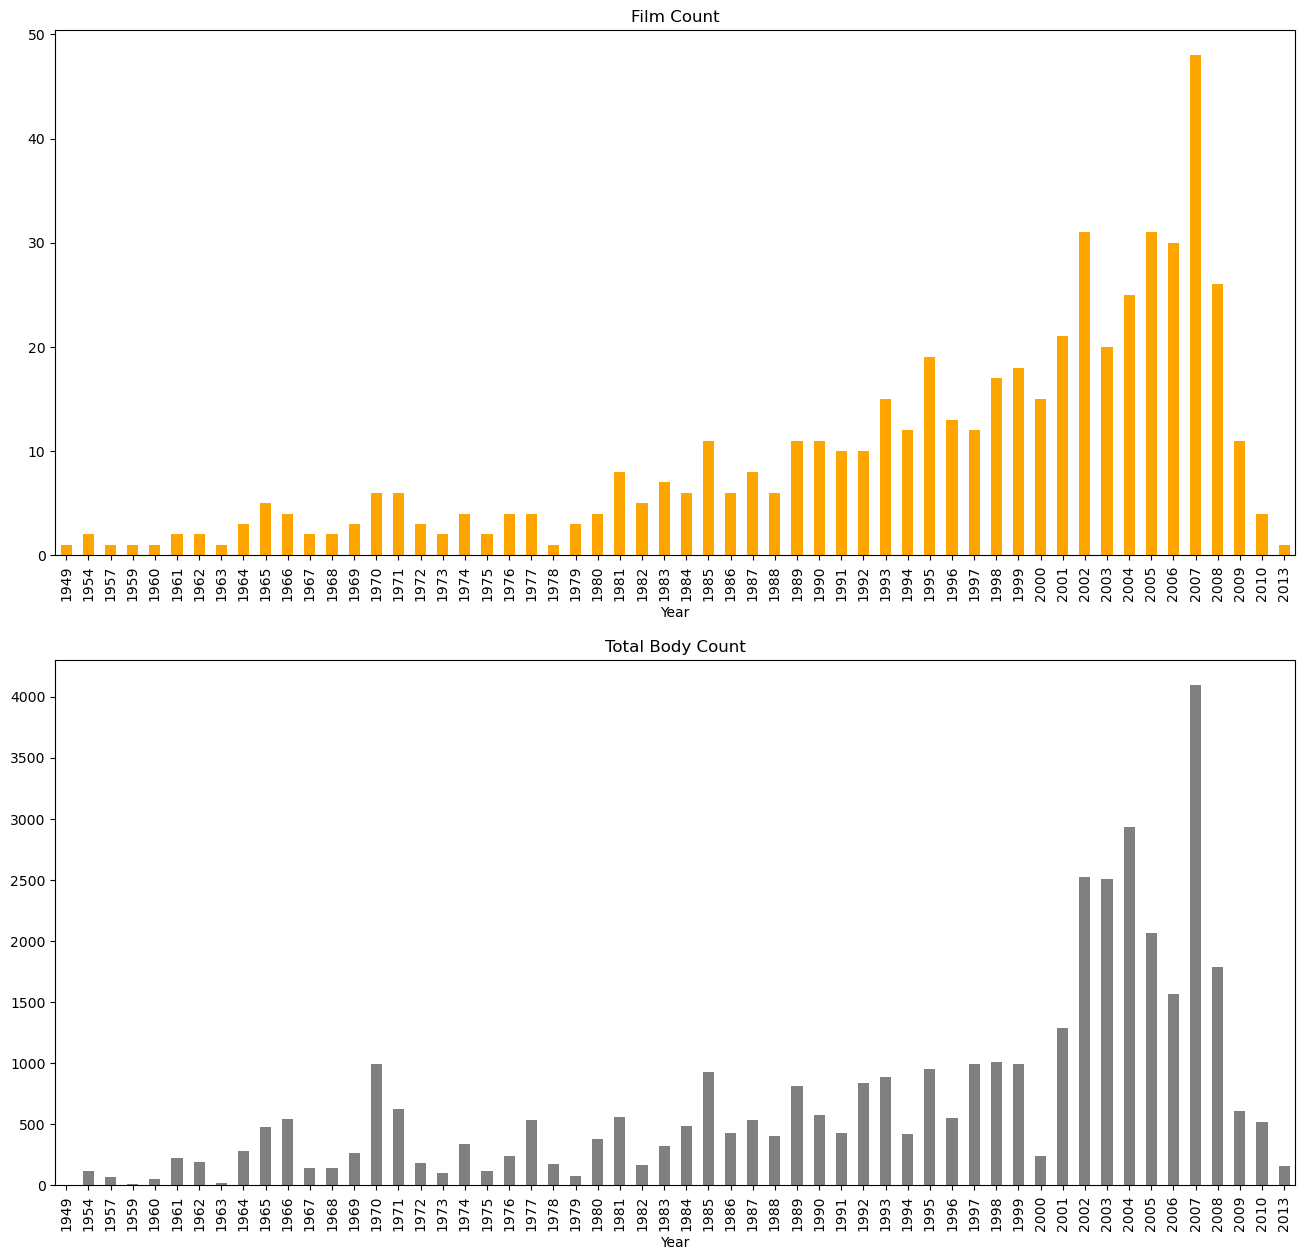

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

# обратите внимание, что здесь меняем синтаксис - делаем график, применяем метод plot из пандас к колонке. 
# И уже в параметрах этого метода прописываем тип графика и ось координат, на которую хотим его положить. 
# При таком подходе у нас каждый год отобразится на оси координат

movies_year['Film_Count'].plot(kind='bar', ax=ax[0], color = '#ffa500')
ax[0].set_title('Film Count')

movies_year['Body_Count'].plot(kind='bar', ax=ax[1], color = 'grey')
ax[1].set_title('Total Body Count');

## Агрегация по фильмам. Сортировка по значения. Горизонтальный столбчатый график

Сейчас мы сгруппируем датасет по фильмам, найдем 10 самых жестоких и визуализируем их.

In [26]:
movies_film = movies.drop_duplicates('Film').set_index('Film') # агрегируем и делаем индексом название фильма, так как индекс станет шкалой
movies_film.head()

,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Film,,,,,,,,,
24 Hour Party People,2002,7.0,R,Biography,Michael Winterbottom,117.0,7.3,1.0,0.059829
28 Days Later,2002,53.0,R,Horror,Danny Boyle,113.0,7.6,1.0,0.469027
28 Weeks Later,2007,212.0,R,Horror,Juan Carlos Fresnadillo,100.0,7.0,1.0,2.120000
30 Days of Night,2007,67.0,R,Horror,David Slade,113.0,6.6,1.0,0.592920
300,2007,600.0,R,Action,Zack Snyder,117.0,7.7,1.0,5.128205


In [27]:
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10) # сортируем и берем 10 последних значений

Film
King Arthur                              378.0
Windtalkers                              389.0
Lord of the Rings: Two Towers            468.0
A Fistful of Dynamite                    471.0
The Last Samurai                         558.0
Troy                                     572.0
Tae Guk Gi: The Brotherhood of War       590.0
300                                      600.0
Kingdom of Heaven                        610.0
Lord of the Rings: Return of the King    836.0
Name: Body_Count, dtype: float64

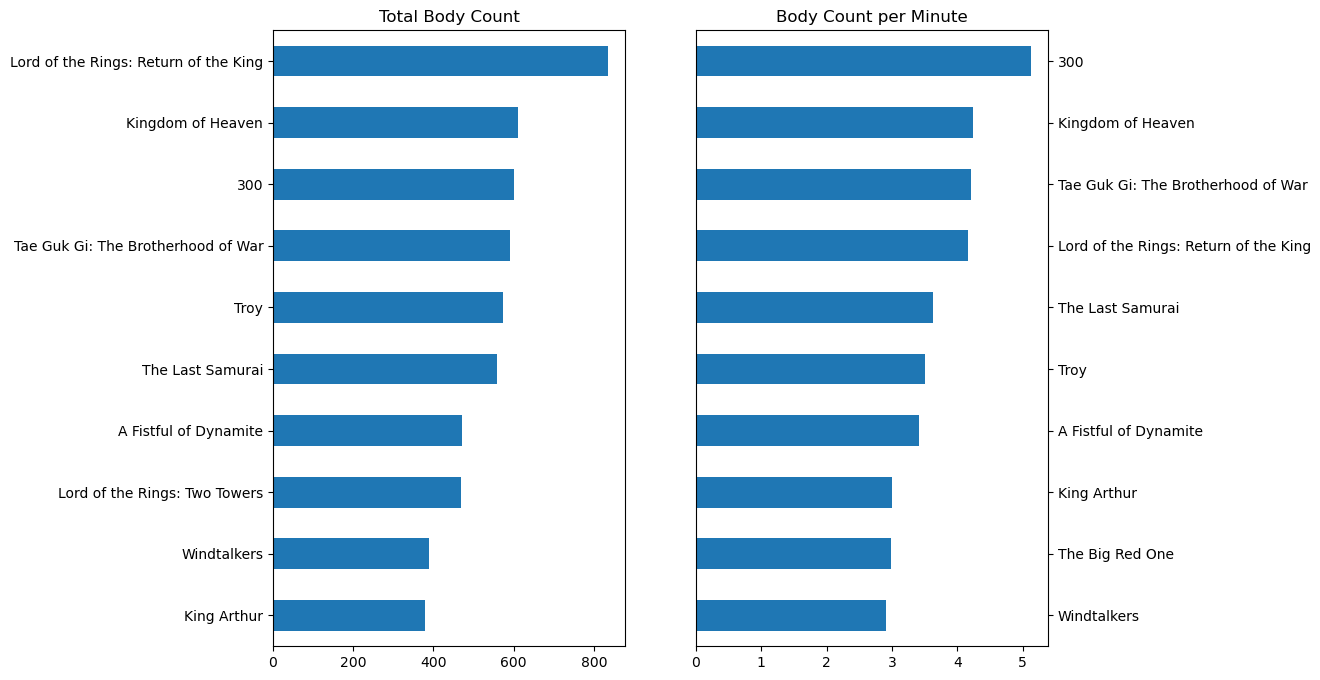

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# график для количества убитых людей в фильме. Горизонтальный график делаем параметром barh (bar horizontal)
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10).plot(
    kind='barh', ax=ax[0])
ax[0].set_title('Total Body Count')

movies_film.sort_values(by=['Body_Count_Min'])['Body_Count_Min'].tail(10).plot(
    kind='barh', ax=ax[1])  # для количества убитых людей на минуту фильма

ax[1].set_title('Body Count per Minute')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel(
        '', visible=False
    )  # убираем подпись к шкале, которая генерируется автоматически

# Рейтинги: график рассеяния для категориальной переменной

Графики рассеяния для категориальных переменных тоже имеют место быть. В данном случае у нас будет категориальная переменная по x (буквенный рейтинг фильма). Такой график помогает нам увидеть разброс значений в рамках категорий, а также некоторые корелляции и зависимости. Не забывайте только добавлять прозрачность, потому что в случае категориальных переменных большое количество точек может накладываться друг на друга.


In [29]:
movies['MPAA_Rating'].value_counts()

MPAA_Rating
R           1082
PG-13        386
PG           122
Unrated       82
Approved      28
G             14
M             13
GP            13
X             10
NR             1
Name: count, dtype: int64

**Упражнение:**
    
Постройте график рассеяния для MPAA_Rating по шкале x, Body_Count_Min по y и в качестве размера точки возьмите абсолютное значение Body Count.

Text(0, 0.5, 'Body count per minute')

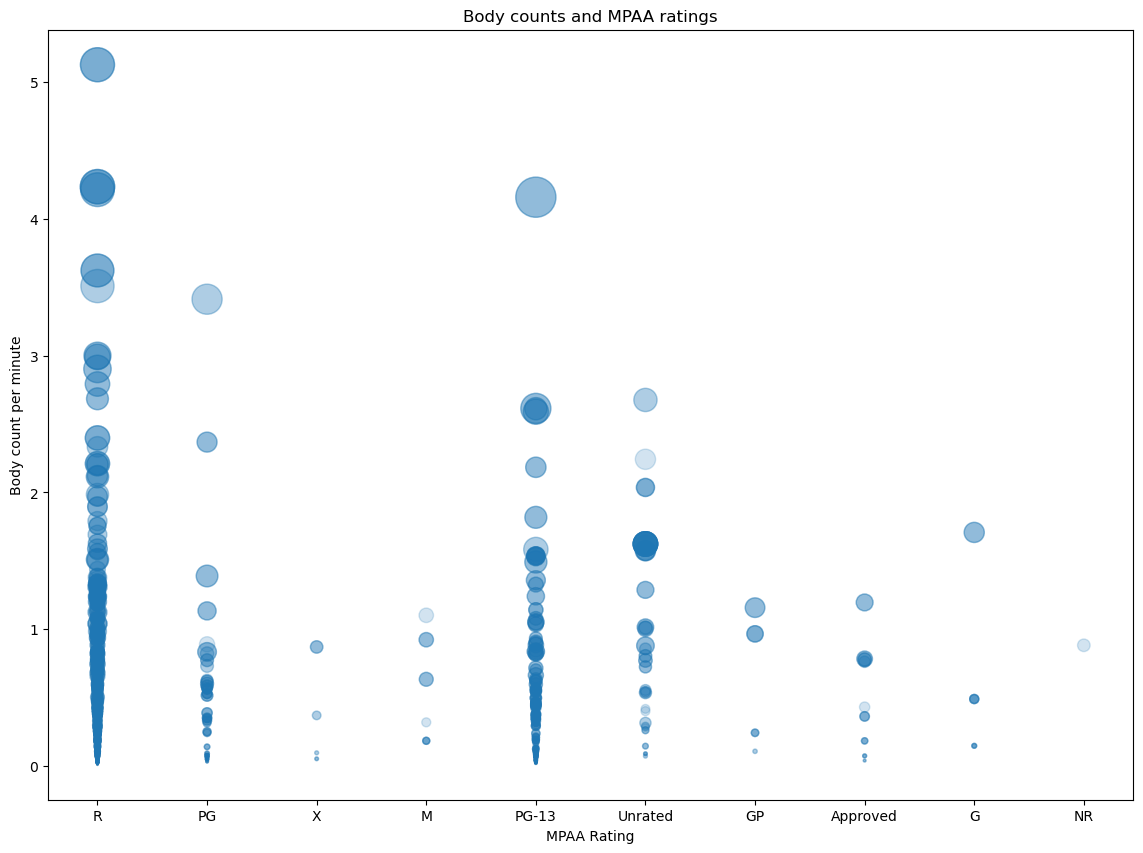

In [30]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(movies['MPAA_Rating'], movies['Body_Count_Min'], s=movies['Body_Count'], alpha=.2)
ax.set_title('Body counts and MPAA ratings')
ax.set_xlabel('MPAA Rating')
ax.set_ylabel('Body count per minute')


Проинтерпретируйте график.

# Рейтинги: график рассеяния, подписываем фильмы

Давайте построим график рассеяния для рейтинга imbd и body count per minute. А так же подпишем значения для трех самых жестоких фильмов.

In [31]:
movies.drop_duplicates('Film').sort_values(by=['Body_Count'], ascending=False).head(3) # находим три самых жестоких фильма


,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
769,Lord of the Rings: Return of the King,2003,836.0,PG-13,Action,Peter Jackson,201.0,8.9,1.0,4.159204
694,Kingdom of Heaven,2005,610.0,R,Action,Ridley Scott,144.0,7.1,1.0,4.236111
12,300,2007,600.0,R,Action,Zack Snyder,117.0,7.7,1.0,5.128205


In [32]:
bc_top = movies.drop_duplicates('Film').sort_values(by=['Body_Count'], ascending=False).head(3) # сохраним датафрейм из трех фильмов
annotations = []
for r in range(len(bc_top)): # сделаем цикл, который сложит нам в список тройки "название фильма - рейтинг - количество убийств на минуту фильма"
    annotations.append([bc_top['Film'].iloc[r], bc_top['IMDB_Rating'].iloc[r], bc_top['Body_Count_Min'].iloc[r]])
annotations

[['Lord of the Rings: Return of the King', 8.9, 4.159203980099503],
 ['Kingdom of Heaven', 7.1, 4.236111111111111],
 ['300', 7.7, 5.128205128205129]]

**Упражнение:**

Сделайте график рассеяния для рейтинга imdb по x, body count per minute для y, и body count для размера точки. Если не успеваем - посмотрите дома самостоятельно, как сделать подписи.

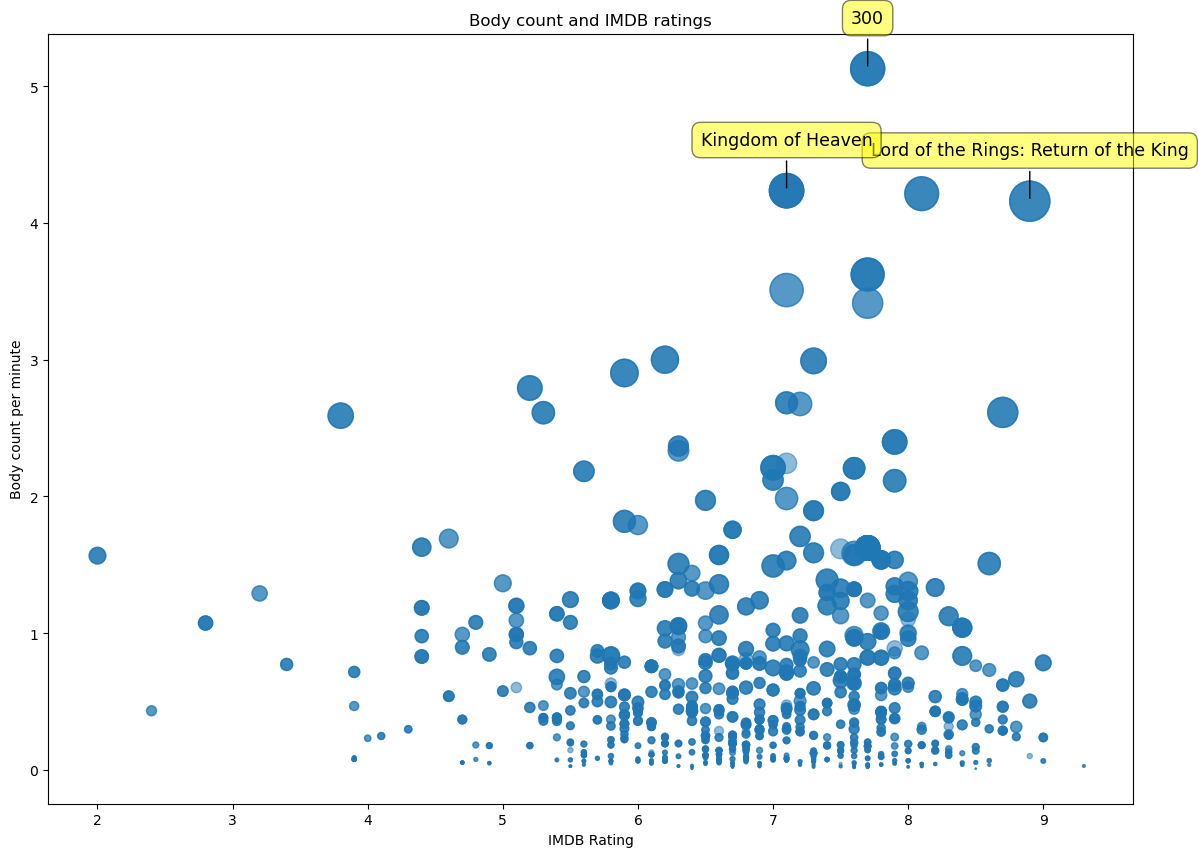

In [33]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(movies['IMDB_Rating'], movies['Body_Count_Min'], s=movies['Body_Count'], alpha=.5)
ax.set_title('Body count and IMDB ratings')
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Body count per minute')

for annotation, x, y in annotations: # идем в наш список с тремя фильмами и итерируемся по нему
    plt.annotate(   # функция, которая подпишет наблюдения в нашем графики
        annotation, # обращаемся к названию фильма
        xy=(x, y),  # задаем координаты точек
        xytext=(0, 30), # задаем координаты текста (смещение на 30 единиц вверх по y)
        textcoords='offset points',
        ha='center',
        va='bottom',
        size=12.5,
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='-'))

## Делаем совмещенные столбчатые диграммы из агрегированных данных

In [34]:
bc = pd.DataFrame({'mean_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count'].mean(),
                        'median_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count'].median()})

bc_min = pd.DataFrame({'mean_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count_Min'].mean(),
                           'median_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count_Min'].median()})

In [35]:
bc.head()

,mean_value,median_value
Year,,
1949,4.0,4.0
1954,57.5,57.5
1957,67.0,67.0
1959,7.0,7.0
1960,55.0,55.0


In [36]:
bc_min.head()

,mean_value,median_value
Year,,
1949,0.038462,0.038462
1954,0.425822,0.425822
1957,0.761364,0.761364
1959,0.088608,0.088608
1960,0.429688,0.429688


Text(0.5, 1.0, 'Body Count by Minute')

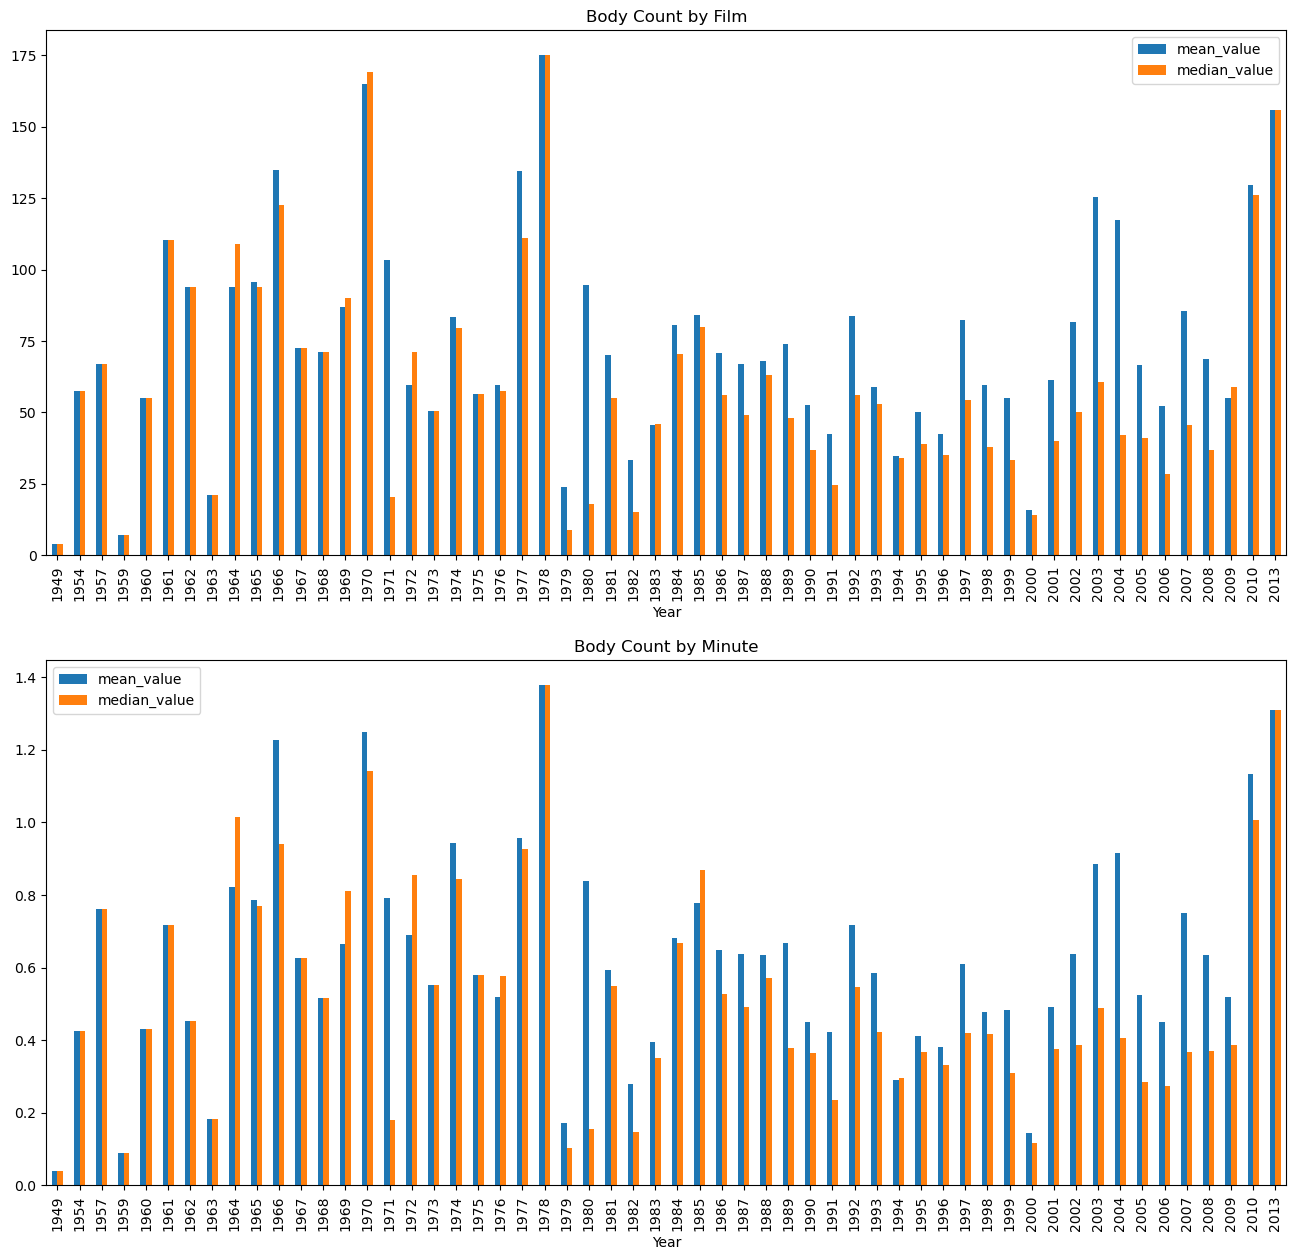

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

bc.plot(kind='bar', ax=ax[0])
ax[0].set_title('Body Count by Film')

bc_min.plot(kind='bar', ax=ax[1])
ax[1].set_title('Body Count by Minute')
  